# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Skip this part if you load stored numpy arrays (Mirai*.npy) (which is recommended)

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 2: Get a graphics card

Skip this part if you run on the CPU

Lets make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming calculations in every training iteration.

In [2]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True) 

KeyboardInterrupt: 

# Part 3: Hardware

Skip questions 1, 2, 3, 5, 6 if you use your own computer.

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal. 

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

Question 3: How much memory does the graphics card have?

Question 4: What is stored in the GPU memory while training a DNN ?

Answer : In the GPU memory, data batch size, parameters in the network, gradients etc can be stored.

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

# Part 4: Load the data

To make this step easier, directly load the data from saved numpy arrays (.npy) (recommended)


Load the dataset from the csv files, it will take some time since it is almost 1.4 GB. 

We will use the function `genfromtxt` to load the data.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html

Load the data from csv files the first time, then save the data as numpy files for faster loading the next time.


In [1]:
import numpy as np

# Load data from numpy arrays
X = np.load(r'C:\Users\suhan\Downloads\Laboration1_DNN\Mirai_data.npy')
Y = np.load(r'C:\Users\suhan\Downloads\Laboration1_DNN\Mirai_labels.npy')

# Remove the first 24 covariates (columns)

X = np.delete(X, np.s_[0:24], 1)

print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class

Class, no_example = np.unique(Y, return_counts=True)
print(dict(zip(Class, no_example)))

The covariates have size (764137, 92).
The labels have size (764137,).
{0.0: 121621, 1.0: 642516}


# Part 5: How good is a naive classifier?

Question 7: Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

Answer : If the naive classifier considers everything to be class 1 then we will have an accuracy of 
642516 / 764137 = 84% for the given data.

In [2]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()
import numpy as np

# Print the number of NaNs (not a number) in the labels

print(sum(np.isnan(Y)))

# Print the number of NaNs in the covariates

print(sum(np.isnan(X)))

0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Part 6: Preprocessing

Lets do some simple preprocessing

In [3]:
# Convert covariates to floats
X = X.astype(float)

# Convert labels to integers
Y = Y.astype(int)

# Remove mean of each covariate (column)

for k in range(X.shape[1]):
    X[:,k] = X[:, k] - np.mean(X[:, k])

# Divide each covariate (column) by its standard deviation
for k in range(X.shape[1]):
    X[:,k] = X[:, k] / np.std(X[:,k])

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std

print(np.mean(X[:,range(X.shape[1])]))
print(np.std(X[:,range(X.shape[1])]))

-2.565209060450084e-17
0.9999999999999979


# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)

We use a function from scikit learn.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [4]:
# Your code
from sklearn.model_selection import train_test_split

Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y, test_size=0.30, shuffle = True, random_state = 123)

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%
print("The number of examples of each class for training data ")
classTrain, no_example = np.unique(Ytrain, return_counts=True)
print(dict(zip(classTrain, no_example)))

print("The number of examples of each class for testing data ")
classTemp, no_example = np.unique(Ytemp, return_counts=True)
print(dict(zip(classTemp, no_example)))


Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
The number of examples of each class for training data 
{0: 85249, 1: 449646}
The number of examples of each class for testing data 
{0: 36372, 1: 192870}


#  Part 8: Split non-training data data into validation and test
Now split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Do all variables (Xtrain,Ytrain), (Xval,Yval), (Xtest,Ytest) have the shape that you expect?
Yes

In [5]:
from sklearn.model_selection import train_test_split

Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5)

print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114621, 92), (114621,) and (114621,)


# Part 9: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

For different parts of this notebook you need to go back here, add more things, and re-run this cell to re-define the build function.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


In [6]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.optimizers import SGD, Adam
from keras.losses import binary_crossentropy


# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer == 'sgd':
        optimized = SGD(lr=learning_rate)
    if optimizer == 'adam':
        optimized = Adam(lr=learning_rate)
   
    
    # Setup a sequential model
    model = Sequential()

    # Add layers to the model, using the input parameters of the build_DNN function
    
    # Add first layer, requires input shape
    model.add(Dense(n_nodes, activation = act_fun, input_shape = input_shape))
    if use_bn == True:
        model.add(BatchNormalization())
    if use_dropout == True:
        model.add(Dropout(0.5))
    if use_custom_dropout == True:
        model.add(myDropout(rate = 0.5))
    
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(n_nodes, activation = act_fun))
        if use_bn == True:
            model.add(BatchNormalization())
        if use_dropout == True:
            model.add(Dropout(0.5))
        if use_custom_dropout == True:
            model.add(myDropout(rate = 0.5))
          
    
    # Final layer
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile model
    model.compile(optimizer= optimized,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [7]:
# Lets define a help function for plotting the training results

import matplotlib.pyplot as plt
def plot_results(history):
    
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 10: Train the DNN

Time to train the DNN, we start simple with 2 layers with 20 nodes each, learning rate 0.1.

Relevant functions

`build_DNN`, the function we defined in Part 9, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method


### 2 layers, 20 nodes

In [75]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (92,)

# Build the model
model1 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='sgd', learning_rate=0.1)
              

# Train the model, provide training data and validation data
history1 = model1.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      validation_data = (Xval, Yval)) 

Epoch 1/20
54/54 [==============================] - 1s 17ms/step - loss: 0.4383 - accuracy: 0.8406 - val_loss: 0.4006 - val_accuracy: 0.8416
Epoch 2/20
54/54 [==============================] - 1s 13ms/step - loss: 0.3817 - accuracy: 0.8406 - val_loss: 0.3570 - val_accuracy: 0.8416
Epoch 3/20
54/54 [==============================] - 1s 13ms/step - loss: 0.3351 - accuracy: 0.8406 - val_loss: 0.3074 - val_accuracy: 0.8416
Epoch 4/20
54/54 [==============================] - 1s 14ms/step - loss: 0.2860 - accuracy: 0.8406 - val_loss: 0.2610 - val_accuracy: 0.8416
Epoch 5/20
54/54 [==============================] - 1s 15ms/step - loss: 0.2460 - accuracy: 0.8501 - val_loss: 0.2285 - val_accuracy: 0.8594
Epoch 6/20
54/54 [==============================] - 1s 16ms/step - loss: 0.2207 - accuracy: 0.8685 - val_loss: 0.2095 - val_accuracy: 0.8911
Epoch 7/20
54/54 [==============================] - 1s 15ms/step - loss: 0.2062 - accuracy: 0.8935 - val_loss: 0.1987 - val_accuracy: 0.9002
Epoch 8/20
54

In [43]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 939us/step - loss: 0.1755 - accuracy: 0.9090
Test loss: 0.1755
Test accuracy: 0.9090


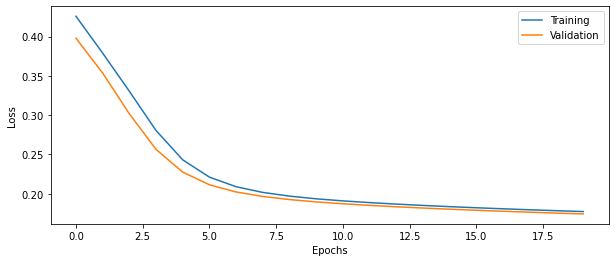

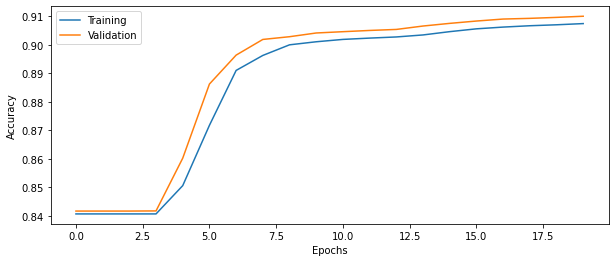

In [44]:
# Plot the history from the training run
plot_results(history1)

# Part 11: More questions

Question 8: What happens if you add several Dense layers without specifying the activation function?

If no activation function is specified, it takes up default activation function which here is linear activation function(a(x) =x) so no activation function is applied. So input and output layers of the dense layer will be the same.

Question 9: How are the weights in each dense layer initialized as default? How are the bias weights initialized?

Each layer has its own default value. For most of the layers, such as Dense, convolution and RNN layers, the default kernel initializer is 'glorot_uniform' and the default bias intializer is 'zeros'.

# Part 12: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [9]:
from sklearn.utils import class_weight

# Calculate class weights
classWeight = class_weight.compute_class_weight(class_weight = 'balanced',
                                                classes = np.unique(Ytrain),
                                                y= Ytrain)
# Print the class weights
print(classWeight)

# Keras wants the weights in this form, uncomment and change value1 and value2 to your weights, 
# or get them from the array that is returned from class_weight

class_weights = {0: 3.13725088,
                 1: 0.59479568}


[3.13725088 0.59479568]


### 2 layers, 20 nodes, class weights

In [76]:
batch_size = 10000
epochs = 20

input_shape = (92,)

# Build the model
model2 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='sgd', learning_rate=0.1)
              

# Train the model, provide training data and validation data
history2 = model1.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight = class_weights,
                      validation_data = (Xval, Yval))
model2.summary()

Epoch 1/20
54/54 [==============================] - 1s 13ms/step - loss: 0.2071 - accuracy: 0.9006 - val_loss: 0.2316 - val_accuracy: 0.9001
Epoch 2/20
54/54 [==============================] - 1s 12ms/step - loss: 0.1932 - accuracy: 0.8987 - val_loss: 0.2331 - val_accuracy: 0.9009
Epoch 3/20
54/54 [==============================] - 1s 14ms/step - loss: 0.1914 - accuracy: 0.8994 - val_loss: 0.2324 - val_accuracy: 0.9013
Epoch 4/20
54/54 [==============================] - 1s 15ms/step - loss: 0.1899 - accuracy: 0.9000 - val_loss: 0.2308 - val_accuracy: 0.9020
Epoch 5/20
54/54 [==============================] - 1s 14ms/step - loss: 0.1886 - accuracy: 0.9006 - val_loss: 0.2303 - val_accuracy: 0.9026
Epoch 6/20
54/54 [==============================] - 1s 14ms/step - loss: 0.1874 - accuracy: 0.9013 - val_loss: 0.2288 - val_accuracy: 0.9034
Epoch 7/20
54/54 [==============================] - 1s 16ms/step - loss: 0.1863 - accuracy: 0.9022 - val_loss: 0.2282 - val_accuracy: 0.9043
Epoch 8/20
54

In [47]:
# Evaluate model on test data
score = model2.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 865us/step - loss: 0.6741 - accuracy: 0.8516
Test loss: 0.6741
Test accuracy: 0.8516


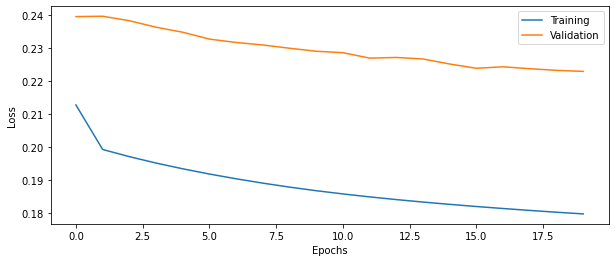

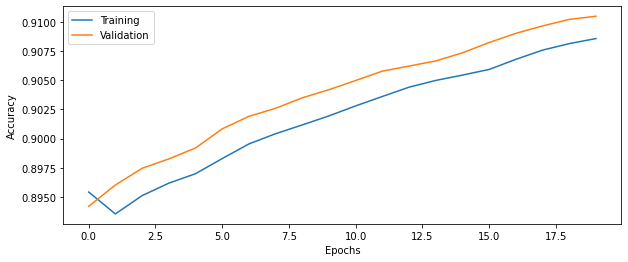

In [48]:
plot_results(history2)

# Part 13: More questions

Skip questions 11 and 12 if you run on the CPU

Question 10: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

Answer: We can train the model with fewer samples which consumes less memory and increases the performance when we use batches of smaller size. We may not be able to put all the data in machine memory at once when the dataset is too big. Hence it is ideal to use smaller batch.

Question 11: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.

Question 12: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

Question 13: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000? 

Answer: Number of weight updates per epoch = number of training examples / batch size
when the batch size = 100 i.e. 534895/100 = 5349 times, 
When the batch size = 1000 i.e. 534895/1000 =  535 times 
when the batch size = 10000 i.e. 534895/10000 = 54 times.

Question 14: What limits how large the batch size can be?

Answer: The batch size can be as large as the number of samples and can be smaller or equal than machine memory.

Question 15: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

Answer: If the batch size is large, the learning rate should be large. If the batch size is small, even the learning rate should be small.

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

# Part 14: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 16: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()


2 dense layers with 20 nodes : 2301 trainable parameters
4 dense layers with 50 nodes : 3141 trainable parameters

### 4 layers, 20 nodes, class weights

In [51]:
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model3 = build_DNN(input_shape=input_shape, n_layers=4, n_nodes=20, act_fun='sigmoid', optimizer='sgd', learning_rate=0.1, 
              use_bn=False, use_dropout=False, use_custom_dropout=False)

history3 = model3.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

model3.summary()

Epoch 1/20
54/54 [==============================] - 2s 28ms/step - loss: 0.6935 - accuracy: 0.3454 - val_loss: 0.6865 - val_accuracy: 0.8416
Epoch 2/20
54/54 [==============================] - 1s 20ms/step - loss: 0.6917 - accuracy: 0.6447 - val_loss: 0.6931 - val_accuracy: 0.4486
Epoch 3/20
54/54 [==============================] - 1s 19ms/step - loss: 0.6911 - accuracy: 0.7311 - val_loss: 0.6911 - val_accuracy: 0.8776
Epoch 4/20
54/54 [==============================] - 1s 20ms/step - loss: 0.6904 - accuracy: 0.7015 - val_loss: 0.6831 - val_accuracy: 0.8416
Epoch 5/20
54/54 [==============================] - 1s 19ms/step - loss: 0.6895 - accuracy: 0.8545 - val_loss: 0.6903 - val_accuracy: 0.8789
Epoch 6/20
54/54 [==============================] - 1s 20ms/step - loss: 0.6884 - accuracy: 0.7940 - val_loss: 0.6900 - val_accuracy: 0.8783
Epoch 7/20
54/54 [==============================] - 1s 19ms/step - loss: 0.6870 - accuracy: 0.8102 - val_loss: 0.6869 - val_accuracy: 0.8806
Epoch 8/20
54

In [52]:
# Evaluate model on test data
score = model3.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 898us/step - loss: 0.2791 - accuracy: 0.8810
Test loss: 0.2791
Test accuracy: 0.8810


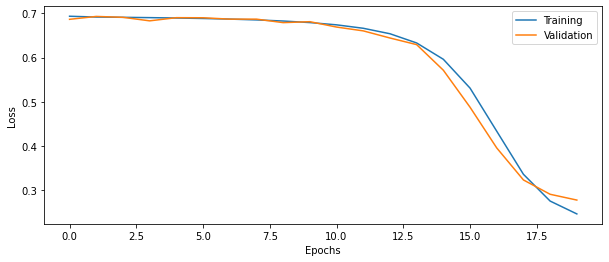

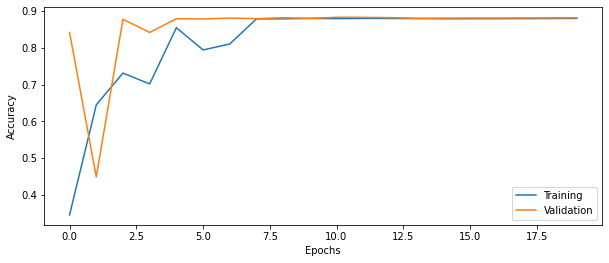

In [53]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [54]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model4 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=50, act_fun='sigmoid', optimizer='sgd', learning_rate=0.1, 
              use_bn=False, use_dropout=False, use_custom_dropout=False)

history4 = model4.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

model4.summary()

Epoch 1/20
54/54 [==============================] - 1s 24ms/step - loss: 0.6379 - accuracy: 0.7559 - val_loss: 0.5547 - val_accuracy: 0.8878
Epoch 2/20
54/54 [==============================] - 1s 24ms/step - loss: 0.4473 - accuracy: 0.8851 - val_loss: 0.3625 - val_accuracy: 0.8857
Epoch 3/20
54/54 [==============================] - 1s 25ms/step - loss: 0.2938 - accuracy: 0.8842 - val_loss: 0.2893 - val_accuracy: 0.8865
Epoch 4/20
54/54 [==============================] - 1s 26ms/step - loss: 0.2419 - accuracy: 0.8858 - val_loss: 0.2695 - val_accuracy: 0.8884
Epoch 5/20
54/54 [==============================] - 1s 25ms/step - loss: 0.2248 - accuracy: 0.8878 - val_loss: 0.2614 - val_accuracy: 0.8906
Epoch 6/20
54/54 [==============================] - 1s 26ms/step - loss: 0.2165 - accuracy: 0.8896 - val_loss: 0.2577 - val_accuracy: 0.8917
Epoch 7/20
54/54 [==============================] - 1s 25ms/step - loss: 0.2112 - accuracy: 0.8906 - val_loss: 0.2519 - val_accuracy: 0.8927
Epoch 8/20
54

In [55]:
# Evaluate model on test data
score = model4.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 829us/step - loss: 0.2311 - accuracy: 0.9024
Test loss: 0.2311
Test accuracy: 0.9024


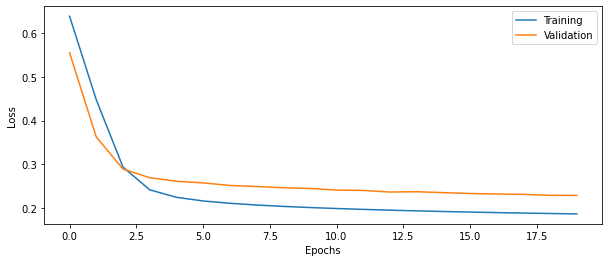

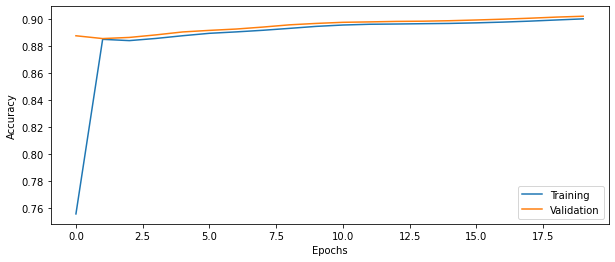

In [56]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [57]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model5 = build_DNN(input_shape=input_shape, n_layers=4, n_nodes=50, act_fun='sigmoid', optimizer='sgd', learning_rate=0.1, 
              use_bn=False, use_dropout=False, use_custom_dropout=False)

history5 = model5.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

model5.summary()

Epoch 1/20
54/54 [==============================] - 2s 40ms/step - loss: 0.6920 - accuracy: 0.6214 - val_loss: 0.6959 - val_accuracy: 0.1587
Epoch 2/20
54/54 [==============================] - 2s 37ms/step - loss: 0.6911 - accuracy: 0.5988 - val_loss: 0.6905 - val_accuracy: 0.8767
Epoch 3/20
54/54 [==============================] - 2s 41ms/step - loss: 0.6901 - accuracy: 0.7228 - val_loss: 0.6998 - val_accuracy: 0.1584
Epoch 4/20
54/54 [==============================] - 2s 40ms/step - loss: 0.6889 - accuracy: 0.7106 - val_loss: 0.6801 - val_accuracy: 0.8425
Epoch 5/20
54/54 [==============================] - 2s 35ms/step - loss: 0.6874 - accuracy: 0.7625 - val_loss: 0.6948 - val_accuracy: 0.1585
Epoch 6/20
54/54 [==============================] - 2s 37ms/step - loss: 0.6854 - accuracy: 0.8295 - val_loss: 0.6779 - val_accuracy: 0.8630
Epoch 7/20
54/54 [==============================] - 2s 37ms/step - loss: 0.6827 - accuracy: 0.8758 - val_loss: 0.6792 - val_accuracy: 0.8785
Epoch 8/20
54

In [58]:
# Evaluate model on test data
score = model5.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 685us/step - loss: 0.2596 - accuracy: 0.8857
Test loss: 0.2596
Test accuracy: 0.8857


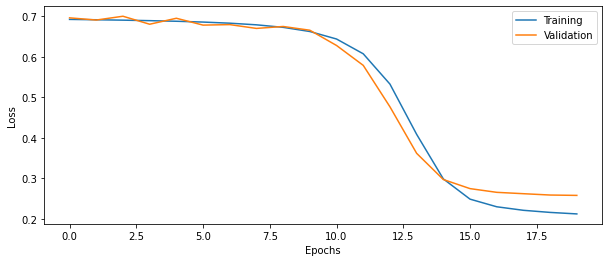

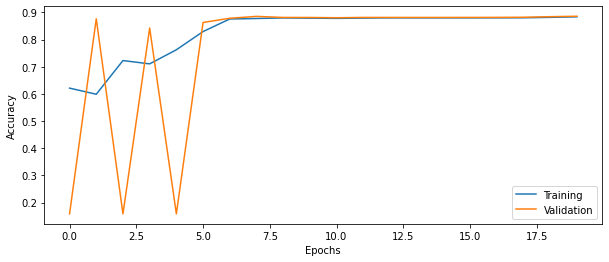

In [59]:
plot_results(history5)

# Part 15: Batch normalization

Now add batch normalization after each dense layer in `build_DNN`. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 17: Why is batch normalization important when training deep networks?

Batch normalization improves speed, performance and stability when training deep networks. It is always ideal to have input centered around zero and has uniform range, but during training when we update parameters in one layer, it changes the input for the next layer, to avoid this we can perform batch normalization.

### 2 layers, 20 nodes, class weights, batch normalization

In [60]:
from keras.layers.normalization import BatchNormalization
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model6 = build_DNN(input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='sgd', learning_rate=0.1, 
              use_bn=True, use_dropout=False, use_custom_dropout=False)

history6 = model6.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

Epoch 1/20
54/54 [==============================] - 2s 29ms/step - loss: 0.2884 - accuracy: 0.8760 - val_loss: 0.4127 - val_accuracy: 0.8416
Epoch 2/20
54/54 [==============================] - 1s 26ms/step - loss: 0.2115 - accuracy: 0.8996 - val_loss: 0.3491 - val_accuracy: 0.8416
Epoch 3/20
54/54 [==============================] - 2s 29ms/step - loss: 0.1957 - accuracy: 0.9053 - val_loss: 0.2997 - val_accuracy: 0.8416
Epoch 4/20
54/54 [==============================] - 1s 27ms/step - loss: 0.1880 - accuracy: 0.9091 - val_loss: 0.2461 - val_accuracy: 0.8459
Epoch 5/20
54/54 [==============================] - 1s 27ms/step - loss: 0.1827 - accuracy: 0.9113 - val_loss: 0.2007 - val_accuracy: 0.8774
Epoch 6/20
54/54 [==============================] - 1s 24ms/step - loss: 0.1789 - accuracy: 0.9125 - val_loss: 0.1780 - val_accuracy: 0.9104
Epoch 7/20
54/54 [==============================] - 1s 25ms/step - loss: 0.1758 - accuracy: 0.9131 - val_loss: 0.1786 - val_accuracy: 0.9158
Epoch 8/20
54

In [61]:
# Evaluate model on test data
score = model6.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 913us/step - loss: 0.1930 - accuracy: 0.9177
Test loss: 0.1930
Test accuracy: 0.9177


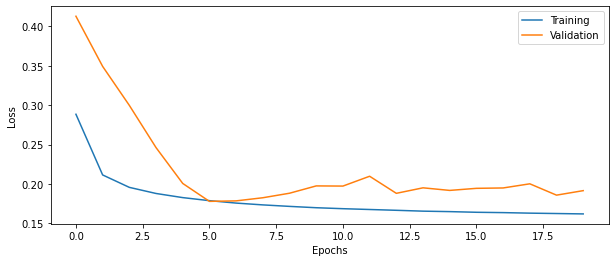

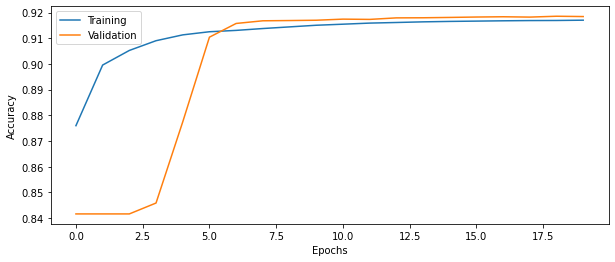

In [62]:
plot_results(history6)

# Part 16: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

https://keras.io/api/layers/activations/

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [63]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model7 = build_DNN(input_shape, n_layers=2, n_nodes=20, act_fun='relu', optimizer='sgd', learning_rate=0.1, 
              use_bn=False, use_dropout=False, use_custom_dropout=False)

history7 = model7.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

Epoch 1/20
54/54 [==============================] - 1s 15ms/step - loss: 0.3170 - accuracy: 0.8595 - val_loss: 0.2716 - val_accuracy: 0.8906
Epoch 2/20
54/54 [==============================] - 1s 11ms/step - loss: 0.2067 - accuracy: 0.8923 - val_loss: 0.2491 - val_accuracy: 0.8965
Epoch 3/20
54/54 [==============================] - 1s 12ms/step - loss: 0.1943 - accuracy: 0.8966 - val_loss: 0.2412 - val_accuracy: 0.8997
Epoch 4/20
54/54 [==============================] - 1s 11ms/step - loss: 0.1884 - accuracy: 0.8993 - val_loss: 0.2308 - val_accuracy: 0.9027
Epoch 5/20
54/54 [==============================] - 1s 12ms/step - loss: 0.1848 - accuracy: 0.9026 - val_loss: 0.2300 - val_accuracy: 0.9059
Epoch 6/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1820 - accuracy: 0.9052 - val_loss: 0.2283 - val_accuracy: 0.9073
Epoch 7/20
54/54 [==============================] - 1s 14ms/step - loss: 0.1797 - accuracy: 0.9065 - val_loss: 0.2233 - val_accuracy: 0.9089
Epoch 8/20
54

In [64]:
# Evaluate model on test data
score = model7.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 852us/step - loss: 0.2088 - accuracy: 0.9162
Test loss: 0.2088
Test accuracy: 0.9162


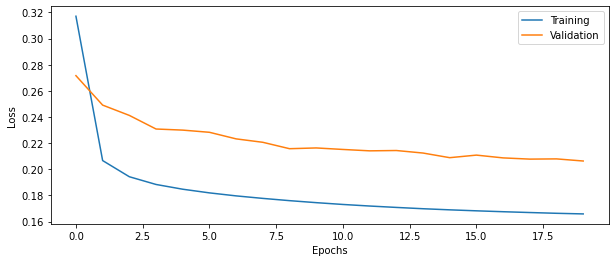

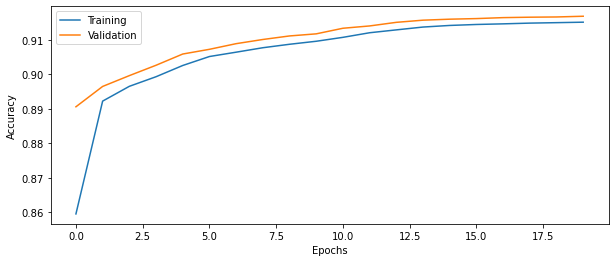

In [65]:
plot_results(history7)

# Part 17: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [68]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model8 = build_DNN(input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='adam', learning_rate=0.1, 
              use_bn=False, use_dropout=False, use_custom_dropout=False)

history8 = model8.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

Epoch 1/20
54/54 [==============================] - 1s 18ms/step - loss: 0.2337 - accuracy: 0.8878 - val_loss: 0.2178 - val_accuracy: 0.9148
Epoch 2/20
54/54 [==============================] - 1s 15ms/step - loss: 0.1684 - accuracy: 0.9146 - val_loss: 0.2062 - val_accuracy: 0.9175
Epoch 3/20
54/54 [==============================] - 1s 15ms/step - loss: 0.1638 - accuracy: 0.9166 - val_loss: 0.2018 - val_accuracy: 0.9181
Epoch 4/20
54/54 [==============================] - 1s 16ms/step - loss: 0.1609 - accuracy: 0.9175 - val_loss: 0.1980 - val_accuracy: 0.9196
Epoch 5/20
54/54 [==============================] - 1s 14ms/step - loss: 0.1591 - accuracy: 0.9185 - val_loss: 0.2101 - val_accuracy: 0.9207
Epoch 6/20
54/54 [==============================] - 1s 12ms/step - loss: 0.1573 - accuracy: 0.9195 - val_loss: 0.2008 - val_accuracy: 0.9217
Epoch 7/20
54/54 [==============================] - 1s 13ms/step - loss: 0.1554 - accuracy: 0.9204 - val_loss: 0.2003 - val_accuracy: 0.9215
Epoch 8/20
54

In [69]:
# Evaluate model on test data
score = model8.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 821us/step - loss: 0.1604 - accuracy: 0.9339
Test loss: 0.1604
Test accuracy: 0.9339


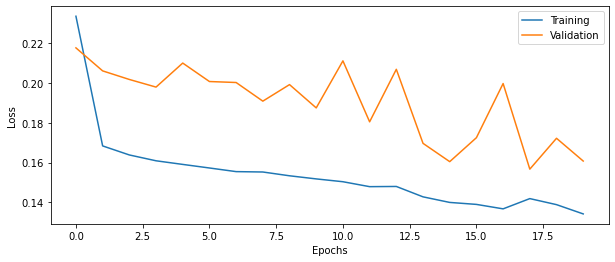

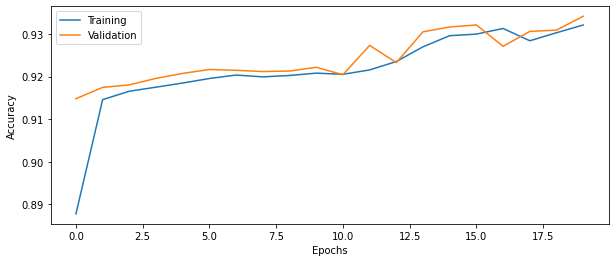

In [70]:
plot_results(history8)

# Part 18: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/api/layers/regularization_layers/dropout/ for how the Dropout layer works.

---

Question 18: How does the validation accuracy change when adding dropout?

Question 19: How does the test accuracy change when adding dropout?

In the initial model, we had higher validation accuracy when compared to the test accuracy. But using dropout model has generalised well. There is no overfitting and we get similiar validation and test accuracy.

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [77]:
# Setup some training parameters
from keras.layers import Dropout
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model9 = build_DNN(input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='sgd', learning_rate=0.1, 
              use_bn=False, use_dropout=True, use_custom_dropout=False)

history9 = model9.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

Epoch 1/20
54/54 [==============================] - 1s 23ms/step - loss: 0.7081 - accuracy: 0.5531 - val_loss: 0.6093 - val_accuracy: 0.8832
Epoch 2/20
54/54 [==============================] - 1s 20ms/step - loss: 0.6255 - accuracy: 0.6496 - val_loss: 0.5329 - val_accuracy: 0.8824
Epoch 3/20
54/54 [==============================] - 1s 22ms/step - loss: 0.5557 - accuracy: 0.7253 - val_loss: 0.4472 - val_accuracy: 0.8783
Epoch 4/20
54/54 [==============================] - 1s 23ms/step - loss: 0.4899 - accuracy: 0.7761 - val_loss: 0.3770 - val_accuracy: 0.8782
Epoch 5/20
54/54 [==============================] - 1s 19ms/step - loss: 0.4367 - accuracy: 0.8069 - val_loss: 0.3287 - val_accuracy: 0.8788
Epoch 6/20
54/54 [==============================] - 1s 20ms/step - loss: 0.3988 - accuracy: 0.8272 - val_loss: 0.3027 - val_accuracy: 0.8793
Epoch 7/20
54/54 [==============================] - 1s 18ms/step - loss: 0.3723 - accuracy: 0.8395 - val_loss: 0.2901 - val_accuracy: 0.8796
Epoch 8/20
54

In [78]:
# Evaluate model on test data
score = model9.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 723us/step - loss: 0.2629 - accuracy: 0.8866
Test loss: 0.2629
Test accuracy: 0.8866


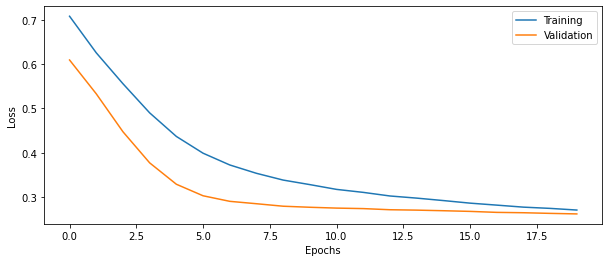

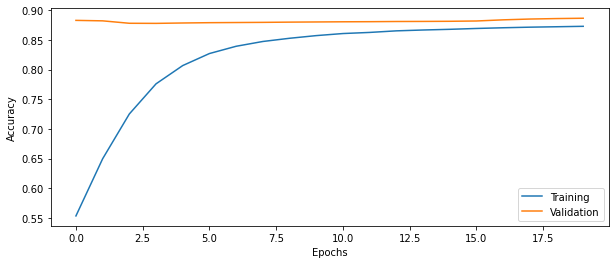

In [79]:
plot_results(history9)

# Part 19: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 20: How high classification accuracy can you achieve for the test data? What is your best configuration?

Classification accuracy : 91.63

Best configuration as follows:
layers: 4
node: 50
batch size: 3000
epoch: 25
Dropout: 0.5
Activation function: relu
optimizer:SGD

In [29]:
# Find your best configuration for the DNN
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

batch_size = 3000
epochs = 25
input_shape = (92,)
# Build and train DNN
model10 = build_DNN(input_shape, n_layers=4, n_nodes=50, act_fun='relu', optimizer='sgd', learning_rate=0.1, 
              use_bn=True, use_dropout=True, use_custom_dropout=False)

history10 = model10.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

Epoch 1/25
179/179 [==============================] - 8s 45ms/step - loss: 0.3941 - accuracy: 0.8529 - val_loss: 0.2269 - val_accuracy: 0.9038
Epoch 2/25
179/179 [==============================] - 7s 40ms/step - loss: 0.2760 - accuracy: 0.8863 - val_loss: 0.2217 - val_accuracy: 0.9005
Epoch 3/25
179/179 [==============================] - 7s 39ms/step - loss: 0.2458 - accuracy: 0.8942 - val_loss: 0.2206 - val_accuracy: 0.9080
Epoch 4/25
179/179 [==============================] - 7s 39ms/step - loss: 0.2297 - accuracy: 0.9000 - val_loss: 0.2159 - val_accuracy: 0.9131
Epoch 5/25
179/179 [==============================] - 7s 38ms/step - loss: 0.2198 - accuracy: 0.9038 - val_loss: 0.2162 - val_accuracy: 0.9142
Epoch 6/25
179/179 [==============================] - 7s 40ms/step - loss: 0.2121 - accuracy: 0.9068 - val_loss: 0.2204 - val_accuracy: 0.9148
Epoch 7/25
179/179 [==============================] - 6s 35ms/step - loss: 0.2057 - accuracy: 0.9089 - val_loss: 0.2161 - val_accuracy: 0.9148

In [30]:
# Evaluate DNN on test data
score = model10.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 7s 2ms/step - loss: 0.2057 - accuracy: 0.9163
Test loss: 0.2057
Test accuracy: 0.9163


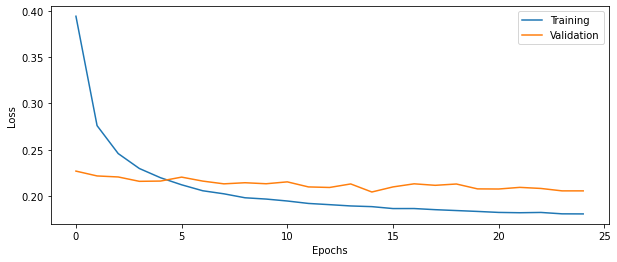

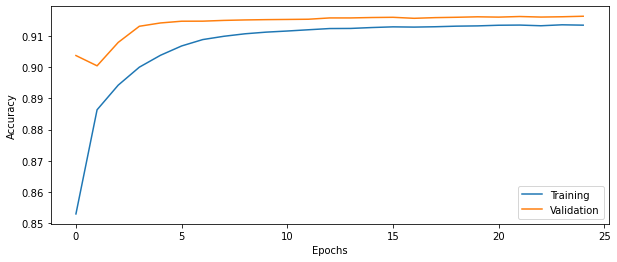

In [31]:
plot_results(history10)

# Part 20: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN. The `build_DNN` function takes two boolean arguments, use_dropout and use_custom_dropout, add a standard Dropout layer if use_dropout is true, add a myDropout layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 21: What is the mean and the standard deviation of the test accuracy?

Mean: 0.9032070046663284
std: 0.00047307301429307173

In [32]:
import keras.backend as K
import keras

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [35]:
# Your best training parameters
batch_size = 3000
epochs = 25
input_shape = (92,)

# Build and train model
model11 = build_DNN(input_shape, n_layers=4, n_nodes=50, act_fun='relu', optimizer='sgd', learning_rate=0.1, 
              use_bn=True, use_dropout=False, use_custom_dropout=True)

history11 = model11.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights,
                      validation_data = (Xval, Yval))

Epoch 1/25
179/179 [==============================] - 8s 46ms/step - loss: 0.3871 - accuracy: 0.8532 - val_loss: 0.3154 - val_accuracy: 0.8903
Epoch 2/25
179/179 [==============================] - 8s 43ms/step - loss: 0.2752 - accuracy: 0.8865 - val_loss: 0.2930 - val_accuracy: 0.8942
Epoch 3/25
179/179 [==============================] - 8s 44ms/step - loss: 0.2475 - accuracy: 0.8936 - val_loss: 0.2770 - val_accuracy: 0.8998
Epoch 4/25
179/179 [==============================] - 7s 37ms/step - loss: 0.2317 - accuracy: 0.8988 - val_loss: 0.2617 - val_accuracy: 0.9034
Epoch 5/25
179/179 [==============================] - 7s 36ms/step - loss: 0.2214 - accuracy: 0.9025 - val_loss: 0.2517 - val_accuracy: 0.9058
Epoch 6/25
179/179 [==============================] - 6s 31ms/step - loss: 0.2136 - accuracy: 0.9049 - val_loss: 0.2460 - val_accuracy: 0.9076
Epoch 7/25
179/179 [==============================] - 6s 32ms/step - loss: 0.2080 - accuracy: 0.9069 - val_loss: 0.2381 - val_accuracy: 0.9097

In [39]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest, Ytest)
                       
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 10s 3ms/step - loss: 0.2206 - accuracy: 0.9147
Test accuracy: 0.9147


In [40]:
# Run the testing 100 times, and save the accuracies in an array
custom_drop = [model11.evaluate(x = Xtest, y = Ytest)[1] for i in range(100)]
    
# Calculate and print mean and std of accuracies
print('Mean: %.4f' % np.mean(custom_drop))


print('Standard deviation %.4f' % np.std(custom_drop))



3582/3582 [==============================] - 13s 4ms/step - loss: 0.2205 - accuracy: 0.9148


3582/3582 [==============================] - 15s 4ms/step - loss: 0.2213 - accuracy: 0.9144
Mean: 0.9146
Standard deviation 0.0001


# Part 21: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 22: What is the mean and the standard deviation of the test accuracy?

Mean: 0.9146
Standard deviation: 0.0001

Question 23: What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.

Cross validation is computationaly heavy compared to dropout.

In [41]:
from sklearn.model_selection import StratifiedKFold

# Define 10-fold cross validation
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)

# Loop over cross validation folds
accuracy = []
for train, test in k_fold.split(X, Y):    
    Xtrain, Xtest = X[train], X[test]
    Ytrain, Ytest = Y[train], Y[test]
    
    # Calculate class weights for current split
    classWeight = class_weight.compute_class_weight(class_weight = 'balanced',
                                                classes = np.unique(Ytrain),
                                                y= Ytrain)
    class_weights = {0: classWeight[0],
                 1: classWeight[1]}
    
    # Rebuild the DNN model, to not continue training on the previously trained model
    batch_size = 3000
    epochs = 25
    input_shape = (92,)

    model12 = build_DNN(input_shape, n_layers=4, n_nodes=50, act_fun='relu', optimizer='sgd', learning_rate=0.1, 
              use_bn=True, use_dropout=False, use_custom_dropout=False)
    
    # Fit the model with training set and class weights for this fold
    history12 = model12.fit(Xtrain, Ytrain,
                      batch_size = batch_size,
                      epochs = epochs,
                      class_weight=class_weights)
    
    # Evaluate the model using the test set for this fold
    score = model12.evaluate(Xtest, Ytest)
    
    # Save the test accuracy in an array
    accuracy.append(score[1])
    
    # Calculate and print mean and std of accuracies
    print('Mean: %.4f' % np.mean(accuracy))


    print('Standard deviation %.4f' % np.std(accuracy))


Epoch 1/25
230/230 [==============================] - 7s 31ms/step - loss: 0.2125 - accuracy: 0.9052
Epoch 2/25
230/230 [==============================] - 7s 29ms/step - loss: 0.1668 - accuracy: 0.9159
Epoch 3/25
230/230 [==============================] - 7s 30ms/step - loss: 0.1594 - accuracy: 0.9172
Epoch 4/25
230/230 [==============================] - 7s 30ms/step - loss: 0.1533 - accuracy: 0.9194
Epoch 5/25
230/230 [==============================] - 6s 26ms/step - loss: 0.1482 - accuracy: 0.9232
Epoch 6/25
230/230 [==============================] - 6s 27ms/step - loss: 0.1430 - accuracy: 0.9270
Epoch 7/25
230/230 [==============================] - 6s 27ms/step - loss: 0.1394 - accuracy: 0.9289
Epoch 8/25
230/230 [==============================] - 6s 25ms/step - loss: 0.1373 - accuracy: 0.9298
Epoch 9/25
230/230 [==============================] - 6s 24ms/step - loss: 0.1344 - accuracy: 0.9311
Epoch 10/25
230/230 [==============================] - 5s 21ms/step - loss: 0.1327 - accura

230/230 [==============================] - 5s 22ms/step - loss: 0.1679 - accuracy: 0.9167
Epoch 3/25
230/230 [==============================] - 5s 20ms/step - loss: 0.1606 - accuracy: 0.9179
Epoch 4/25
230/230 [==============================] - 4s 18ms/step - loss: 0.1562 - accuracy: 0.9189
Epoch 5/25
230/230 [==============================] - 4s 19ms/step - loss: 0.1521 - accuracy: 0.9207
Epoch 6/25
230/230 [==============================] - 6s 25ms/step - loss: 0.1473 - accuracy: 0.9240
Epoch 7/25
230/230 [==============================] - 5s 23ms/step - loss: 0.1431 - accuracy: 0.9264
Epoch 8/25
230/230 [==============================] - 5s 22ms/step - loss: 0.1397 - accuracy: 0.9284
Epoch 9/25
230/230 [==============================] - 6s 25ms/step - loss: 0.1366 - accuracy: 0.9300
Epoch 10/25
230/230 [==============================] - 5s 23ms/step - loss: 0.1348 - accuracy: 0.9309
Epoch 11/25
230/230 [==============================] - 5s 22ms/step - loss: 0.1333 - accuracy: 0.9317

Epoch 1/25
230/230 [==============================] - 3s 15ms/step - loss: 0.2111 - accuracy: 0.9051
Epoch 2/25
230/230 [==============================] - 3s 14ms/step - loss: 0.1681 - accuracy: 0.9156
Epoch 3/25
230/230 [==============================] - 3s 14ms/step - loss: 0.1606 - accuracy: 0.9174
Epoch 4/25
230/230 [==============================] - 3s 15ms/step - loss: 0.1550 - accuracy: 0.9195
Epoch 5/25
230/230 [==============================] - 4s 15ms/step - loss: 0.1515 - accuracy: 0.9215
Epoch 6/25
230/230 [==============================] - 3s 14ms/step - loss: 0.1479 - accuracy: 0.9236
Epoch 7/25
230/230 [==============================] - 3s 14ms/step - loss: 0.1444 - accuracy: 0.9255
Epoch 8/25
230/230 [==============================] - 3s 14ms/step - loss: 0.1402 - accuracy: 0.9279
Epoch 9/25
230/230 [==============================] - 3s 14ms/step - loss: 0.1373 - accuracy: 0.9294
Epoch 10/25
230/230 [==============================] - 3s 15ms/step - loss: 0.1353 - accura

230/230 [==============================] - 3s 15ms/step - loss: 0.1663 - accuracy: 0.9162
Epoch 3/25
230/230 [==============================] - 4s 16ms/step - loss: 0.1595 - accuracy: 0.9179
Epoch 4/25
230/230 [==============================] - 4s 17ms/step - loss: 0.1562 - accuracy: 0.9190
Epoch 5/25
230/230 [==============================] - 3s 15ms/step - loss: 0.1524 - accuracy: 0.9201
Epoch 6/25
230/230 [==============================] - 3s 15ms/step - loss: 0.1488 - accuracy: 0.9218
Epoch 7/25
230/230 [==============================] - 3s 15ms/step - loss: 0.1446 - accuracy: 0.9248
Epoch 8/25
230/230 [==============================] - 4s 15ms/step - loss: 0.1415 - accuracy: 0.9272
Epoch 9/25
230/230 [==============================] - 3s 15ms/step - loss: 0.1385 - accuracy: 0.9289
Epoch 10/25
230/230 [==============================] - 3s 14ms/step - loss: 0.1357 - accuracy: 0.9305
Epoch 11/25
230/230 [==============================] - 3s 14ms/step - loss: 0.1338 - accuracy: 0.9314

# Part 22: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 24: How would you change the DNN in order to use it for regression instead?

Linear activation(in Keras if no activation function is specified, linear activation is selected by default) is used for the output layer because it is a regression which is used to predict numerical values instead of transformation.
We will have to change the loss function to something(MSE or MAE) that is more suitable for regression case.


## Report

Send in this jupyter notebook, with answers to all questions.